# Importações

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from joblib import load

In [58]:
model = load('models/rf_best_model.joblib')

train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')

target = 'Kingdom_group_encoded'
labels = ['Animalia', 'Bacteria', 'Plantae', 'Virus']

X_train = train_df.drop(target, axis=1)
y_train = train_df[target]

X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

# Global Surrogate Model

Fidelidade mede o quão bem a árvore simples está imitando a Random Forest complexa.

Passo a passo para criar o modelo substituto global:
1. Treine a Random Forest no conjunto de dados original.
2. Gere previsões usando a Random Forest para o conjunto de dados de treinamento.
3. Treine uma árvore de decisão simples usando as previsões da Random Forest como rótulos.
4. Avalie a fidelidade do modelo substituto comparando suas previsões com as da Random Forest.

In [59]:
# Usamos o X_train para gerar os "pseudo-rótulos" que o substituto tentará imitar
y_pred_black_box = model.predict(X_train)

# Treinando o Modelo Substituto
surrogate_model = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=10)

surrogate_model.fit(X_train, y_pred_black_box)

y_pred_surrogate = surrogate_model.predict(X_train)
fidelity = accuracy_score(y_pred_black_box, y_pred_surrogate)

/Users/jvlm/repositories/model_interpretability_project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


In [60]:
print(classification_report(y_train, y_pred_surrogate, target_names=labels))

              precision    recall  f1-score   support

    Animalia       0.82      0.96      0.88      2435
    Bacteria       0.75      0.75      0.75      2350
     Plantae       0.57      0.24      0.33      2018
       Virus       0.56      0.74      0.64      2441

    accuracy                           0.69      9244
   macro avg       0.68      0.67      0.65      9244
weighted avg       0.68      0.69      0.67      9244



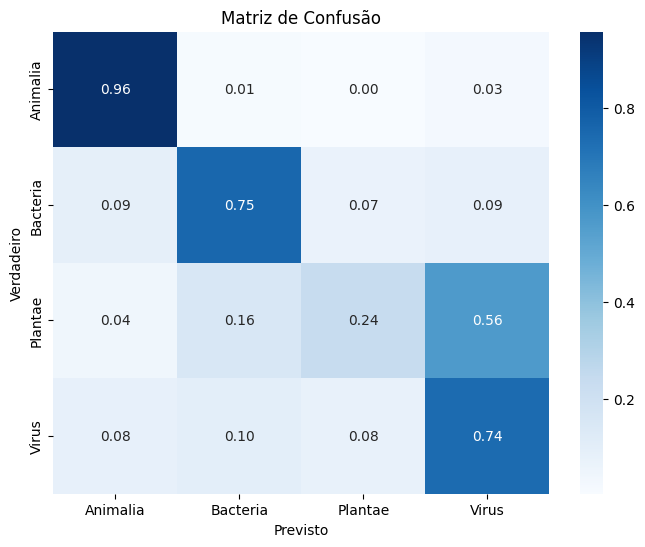

In [61]:
cm = confusion_matrix(y_train, y_pred_surrogate, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

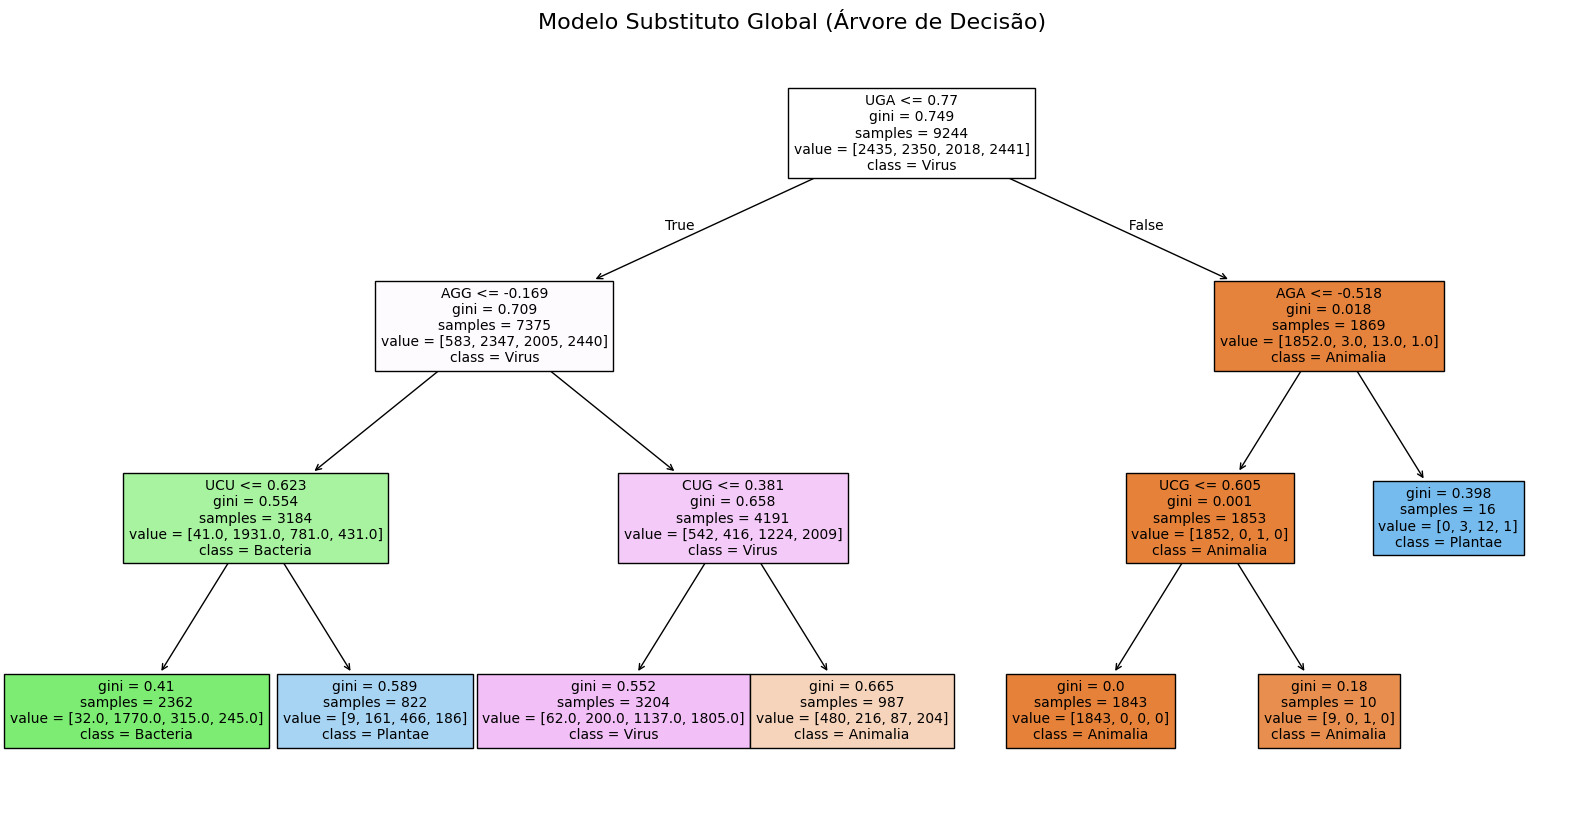

In [63]:
plt.figure(figsize=(20, 10))

plot_tree(surrogate_model, 
          feature_names=X_train.columns, 
          class_names=labels, 
          filled=True, 
          fontsize=10)

plt.title(f"Modelo Substituto Global (Árvore de Decisão)", fontsize=16)
plt.savefig("global_surrogate_tree.png", dpi=300, bbox_inches='tight')
plt.show()
